<a href="https://colab.research.google.com/github/1dhiman/100days-ml/blob/master/2019/1_Dynamic_Pricing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Pricing of Theatre

Dynamic pricing is the practice of adjusting a price to meet its demand, or market value. 
Given the difficulty of selling 100% of a performance’s tickets and that any unsold tickets immediately expire once a performance starts, dynamic pricing shows promise of lowering ticket prices while increasing revenue for shows. 

[Source](https://towardsdatascience.com/statistics-for-dynamic-pricing-of-theatre-87df073a0848)

## How does price influences the purchasing of a ticket to theatre?

In any microeconomic market, it is assumed that each potential customer has a reservation price of which they will pay below but not exceed. The distribution of reservation price is related to disposable income¹, thus behaving in a **lognormal** fashion.

Assume that the mean reservation price (mrp) of an audience is `$65` and the standard deviation is `$25`.

* If pricing economics were normally distributed, customer reserve price would be symmetrically distributed as shown in the below PDF
* Notably, there are equal number low price customers as there are high. Thus, as the CDF moves from high prices to low, the % of paying customers rises in a symmetrical pattern above and below the median — which is also the inflection point.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def get_normal_dist(mrp = 65, std = 25, size = 10_000):
    """
    returns an array of normally distributed prices
    
    mrp = mean reserve price
        the max a customer is willing to pay.
        
    std = standard deviation of skew
        95% of the data fits within 2 std's        
        
    """
    np.random.seed(1)
    audience = np.random.normal(mrp, std, size)
    return audience

In [3]:
audience = get_normal_dist(mrp=65, std=25)
audience = np.clip(audience, a_min=1, a_max=250)
mean = audience.mean()
std = audience.std()

print(mean, std)

65.27881919325928 24.872651252477407


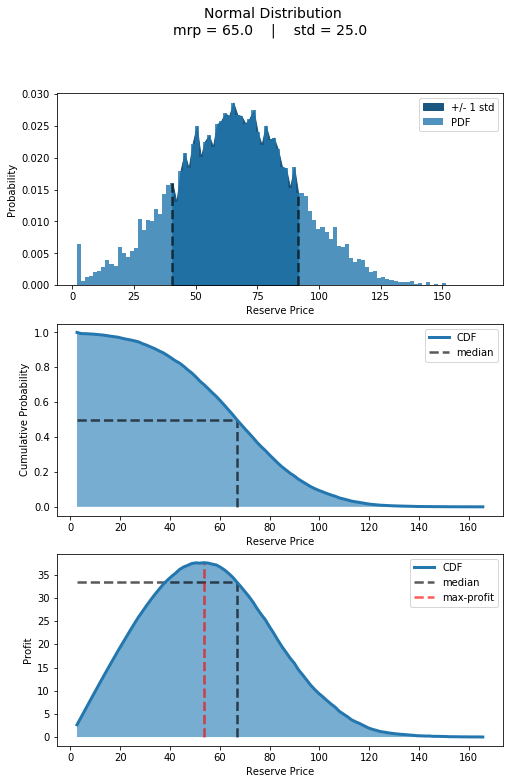

In [4]:
fig = plt.figure(figsize=(8,12))
plt.suptitle(f'Normal Distribution\nmrp = {round(mean)}    |    std = {round(std)} \n', size =14)

plt.subplot(3, 1, 1)
prob, x = np.histogram(audience, bins=100)
prob = np.divide(prob, prob.sum())
x = x[1:]

idx_1 = np.sum([x<mean-std])
idx_2 = np.sum([x<mean+std])

plt.bar(x, prob, width= x[1]-x[0],color='#2377ae',alpha=0.80, label = 'PDF')

for idx in [idx_1, idx_2]:
    plt.vlines(x[idx], 0, prob[idx], colors='black', 
               linestyles='--', linewidth=2.5, alpha=0.65)

plt.fill_between(x, prob, 0, where=((x>=x[idx_1]) & (x<=x[idx_2])), color='#195780',alpha=1.0, label='+/- 1 std')


plt.xlabel('Reserve Price')
plt.ylabel('Probability')
plt.legend()

# -------------------------

cum_prob = np.cumsum(prob[::-1])[::-1]

plt.subplot(3, 1, 2)
plt.plot(x, cum_prob,color='#2377ae', label = 'CDF', linewidth=3)

idx = np.sum(cum_prob>=0.5)
plt.vlines(x[idx], 0, cum_prob[idx], colors='black', linestyles='--', linewidth=2.5, alpha=0.65, label = 'median')
plt.hlines(cum_prob[idx], x[0], x[idx],colors='black', linestyles='--', linewidth=2.5, alpha=0.65)

plt.fill_between(x, cum_prob, 0, alpha=0.60)

plt.xlabel('Reserve Price')
plt.ylabel('Cumulative Probability')
plt.legend()

# -------------------------

cum_profit = cum_prob*x

plt.subplot(3, 1, 3)
plt.plot(x, cum_profit, color='#2377ae', label = 'CDF', linewidth=3)
    
plt.vlines(x[idx], 0, cum_profit[idx], colors='black', linestyles='--', linewidth=2.5, alpha=0.65, label = 'median')
plt.hlines(cum_profit[idx], x[0], x[idx],colors='black', linestyles='--', linewidth=2.5, alpha=0.65)

idx = np.where(cum_profit==cum_profit.max())[0]
plt.vlines(x[idx], 0, cum_profit[idx], colors='red', linestyles='--', linewidth=2.5, alpha=0.65, label = 'max-profit')

plt.fill_between(x, cum_profit, 0, alpha=0.60)

plt.xlabel('Reserve Price')
plt.ylabel('Profit')
plt.legend()

plt.show()

normal_prices = x
normal_profit = cum_profit
normal_max_profit = cum_profit.max()
normal_max_profit_idx = np.where(cum_profit==cum_profit.max())[0]

If pricing economics were **log-normally distributed**, (as they are) customer reserve price would be asymmetrically distributed as shown in the below PDF. 

* There are far more customers interested in lower prices, with a select minority interested in significantly high prices.
* The CDF demonstrates this trend with an accelerating slope until it softens at its peak — customers want cheaper prices at an exponential rate of increase in demand.

In [0]:
def get_lognormal_dist(mrp = 65, std = 25, size = 10_000):
    """
    returns an array of reservation prices
    
    mrp = mean reserve price
        the max a customer is willing to pay.
        
    std = standard deviation of skew
        95% of the data fits within 2 std's        
        
    """
    # first get normal distributions
    np.random.seed(1)
    audience = np.random.normal(mrp, std, size)

    # calculate the log values for mu and sigma
    mu = np.log(audience.mean())
    sigma = (mu - np.log(audience.std()))/2
    
    mu = mu - 0.5*(sigma**2)
    
    log_audience = np.random.lognormal(mu, sigma, size)

    return log_audience

In [6]:
audience = get_lognormal_dist(mrp=65, std=25)
audience = np.clip(audience, a_min=1, a_max=250)

mu = np.log(audience).mean()
std = np.log(audience).std()

mean_adj = np.exp(mu)

print(mean_adj, std)

58.392047244932165 0.48021750433078686


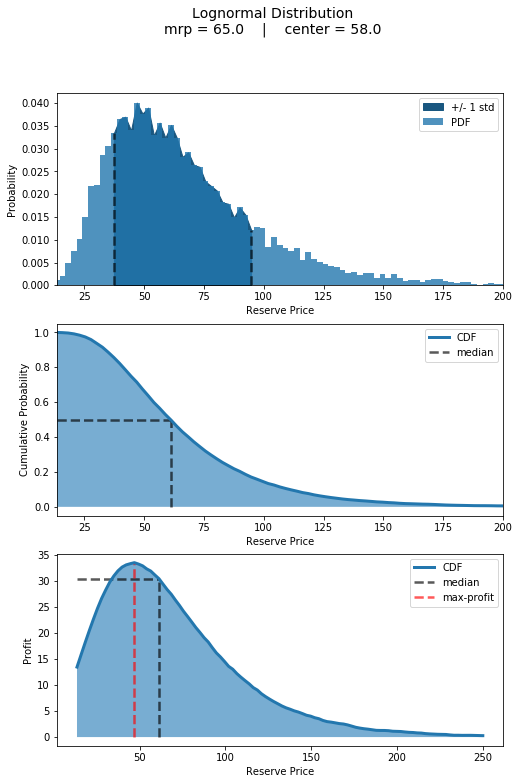

In [7]:
fig = plt.figure(figsize=(8,12))
plt.suptitle(f'Lognormal Distribution\nmrp = {round(mean)}    |    center = {round(mean_adj)}', size =14)

plt.subplot(3, 1, 1)
prob, x = np.histogram(audience, bins=100)
prob = np.divide(prob, prob.sum())
std_1 = np.exp(mu-std)
std_2 = np.exp(mu+std)

x = x[1:]
plt.bar(x, prob, width= x[1]-x[0],color='#2377ae',alpha=0.80, label = 'PDF')

idx_1 = np.sum([x<std_1])
idx_2 = np.sum([x<std_2])
for idx in [idx_1, idx_2]:
    plt.vlines(x[idx], 0, prob[idx], colors='black', 
               linestyles='--', linewidth=2.5, alpha=0.65)

plt.fill_between(x, prob, 0, where=((x>=x[idx_1]) & (x<=x[idx_2])), color='#195780',alpha=1.0, label='+/- 1 std')


plt.xlabel('Reserve Price')
plt.ylabel('Probability')
plt.xlim(left=x.min(), right=200)
plt.legend()

# ---------------------------

cum_prob = np.cumsum(prob[::-1])[::-1]

plt.subplot(3, 1, 2)
plt.plot(x, cum_prob,color='#2377ae', label = 'CDF', linewidth=3)

idx = np.sum(cum_prob>=0.5)
plt.vlines(x[idx], 0, cum_prob[idx], colors='black', linestyles='--', linewidth=2.5, alpha=0.65, label = 'median')
plt.hlines(cum_prob[idx], x[0], x[idx],colors='black', linestyles='--', linewidth=2.5, alpha=0.65)

plt.fill_between(x, cum_prob, 0, alpha=0.60)
plt.xlim(left= x.min(), right = 200)
plt.xlabel('Reserve Price')
plt.ylabel('Cumulative Probability')
plt.legend()

# ---------------------------

cum_profit = cum_prob * x

plt.subplot(3, 1, 3)
plt.plot(x, cum_profit, color='#2377ae', label = 'CDF', linewidth=3)
    
plt.vlines(x[idx], 0, cum_profit[idx], colors='black', linestyles='--', linewidth=2.5, alpha=0.65, label = 'median')
plt.hlines(cum_profit[idx], x[0], x[idx],colors='black', linestyles='--', linewidth=2.5, alpha=0.65)

idx = np.where(cum_profit==cum_profit.max())[0]
plt.vlines(x[idx], 0, cum_profit[idx], colors='red', linestyles='--', linewidth=2.5, alpha=0.65, label = 'max-profit')

plt.fill_between(x, cum_profit, 0, alpha=0.60)

plt.xlabel('Reserve Price')
#plt.xlim(0, mean+(3*std))
plt.ylabel('Profit')
plt.legend()

plt.show()

lognormal_prices = x
lognormal_profit = cum_profit
lognormal_max_profit = cum_profit.max()
lognormal_max_profit_idx = np.where(cum_profit==cum_profit.max())[0]

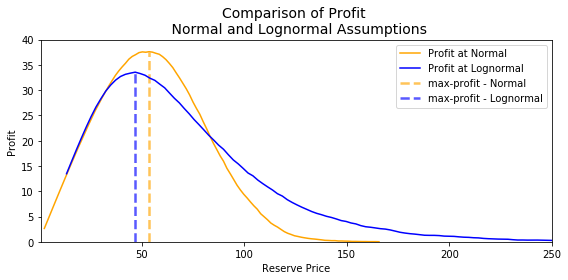

In [8]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,1,1)

plt.plot(normal_prices, normal_profit, color='orange', label="Profit at Normal")
plt.vlines(normal_prices[normal_max_profit_idx], 0, normal_profit[normal_max_profit_idx], 
           colors='orange', linestyles='--', linewidth=2.5, alpha=0.65, label = 'max-profit - Normal')

plt.plot(lognormal_prices, lognormal_profit, color="blue", label="Profit at Lognormal")
plt.vlines(lognormal_prices[lognormal_max_profit_idx], 0, lognormal_profit[lognormal_max_profit_idx], 
           colors='blue', linestyles='--', linewidth=2.5, alpha=0.65, label = 'max-profit - Lognormal')

plt.title("Comparison of Profit \n Normal and Lognormal Assumptions", size =14)

plt.xlim(1, 250)
plt.ylim(0, 40)

plt.xlabel("Reserve Price")
plt.ylabel("Profit")

plt.legend()
plt.tight_layout()
plt.show()

Customer reserve price behaves according to a lognormal distribution — meaning that there are significantly more customers who want cheaper prices rather than expensive ones. Profit is maximized at prices below the Mean Reserved Price